In [1]:
#IMPORT REQUIRED PACKAGE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READ .CSV FILE
df = pd.read_csv(r'influencer.csv')

In [3]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [4]:
#CLEAN DATA-CONVERT DATA TYPE
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [5]:
def numbers(x):
    a =[]
    for f in x:
        if 'k' in f:
            n = round(1000*float(f.replace('k','')),0)
        if 'm' in f:
            n = round(1000000*float(f.replace('m','')),0)
        if 'b' in f:
            n = round(1000000000*float(f.replace('b','')),0)
        a.append(n)
    return a

In [6]:
df['Followers'] = numbers(df['Followers'].to_list())
df['Avg. Likes'] = numbers(df['Avg. Likes'].to_list())
df['Posts'] = numbers(df['Posts'].to_list())
df['New Post Avg. Likes'] = numbers(df['New Post Avg. Likes'].to_list())
df['Total Likes'] = numbers(df['Total Likes'].to_list())

In [7]:
df['Channel Info'] = df['Channel Info'].str.replace('\n', '')

In [8]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers              float64
Avg. Likes             float64
Posts                  float64
60-Day Eng Rate        float64
New Post Avg. Likes    float64
Total Likes            float64
Country Or Region       object
dtype: object

In [9]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [10]:
df.fillna(df['Country Or Region'].mode()[0], inplace= True)

In [11]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [12]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,7000.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,danbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,raisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,luansantana,79,33500000.0,193300.0,4200.0,0.003,82600.0,1.672000e+08,Brazil


In [13]:
df.duplicated().sum()

0

In [14]:
x=df[['Rank','Influence Score','Followers','Avg. Likes','Posts','60-Day Eng Rate','New Post Avg. Likes','Total Likes']]

1. Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated.

In [15]:
corr = x.corr().abs()
corr

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,0.354843,0.698193,0.277699,0.009625,0.028900,0.271939,0.465119
Influence Score,0.354843,1.000000,0.365428,0.048502,0.111230,0.072460,0.038747,0.234987
Followers,0.698193,0.365428,1.000000,0.346829,0.060068,0.107439,0.260593,0.667546
Avg. Likes,0.277699,0.048502,0.346829,1.000000,0.120566,0.789359,0.893544,0.361296
Posts,0.009625,0.111230,0.060068,0.120566,1.000000,0.089915,0.057543,0.083969
60-Day Eng Rate,0.028900,0.072460,0.107439,0.789359,0.089915,1.000000,0.866295,0.001560
New Post Avg. Likes,0.271939,0.038747,0.260593,0.893544,0.057543,0.866295,1.000000,0.351164
Total Likes,0.465119,0.234987,0.667546,0.361296,0.083969,0.001560,0.351164,1.000000


<Axes: >

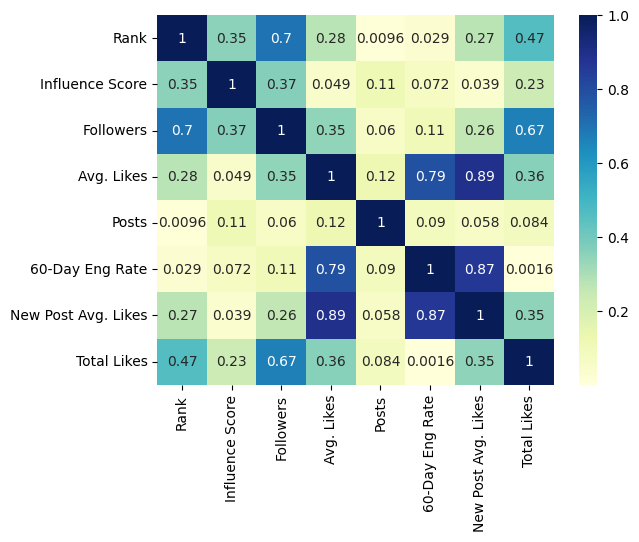

In [17]:
sns.heatmap(corr, annot=True, cmap="YlGnBu")

2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

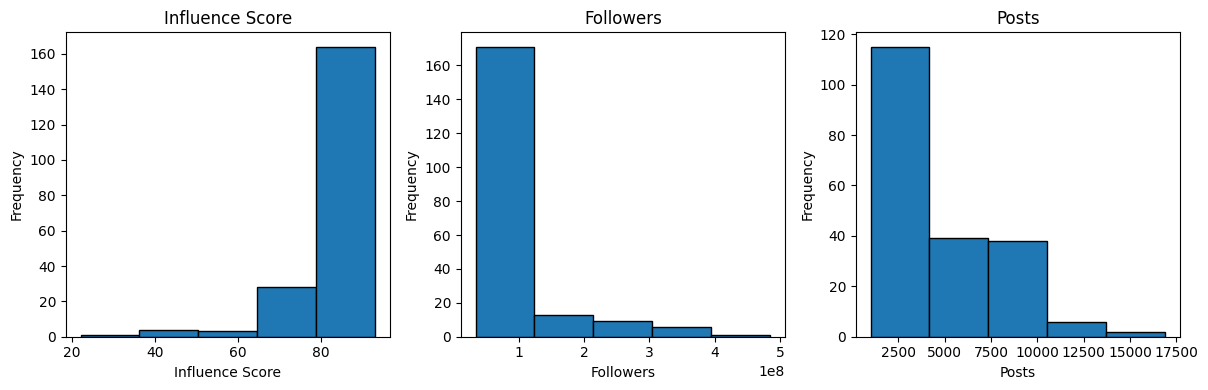

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Influence Score'], bins=5, edgecolor='black')
plt.title('Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')

# Frequency distribution of Followers
plt.subplot(1, 3, 2)
plt.hist(df['Followers'], bins=5, edgecolor='black')
plt.title('Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')

# Frequency distribution of Posts
plt.subplot(1, 3, 3)
plt.hist(df['Posts'], bins=5, edgecolor='black')
plt.title('Posts')
plt.xlabel('Posts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Which country houses the highest number of Instagram Influencers? Please show the
count of Instagram influencers in different countries using barchart.

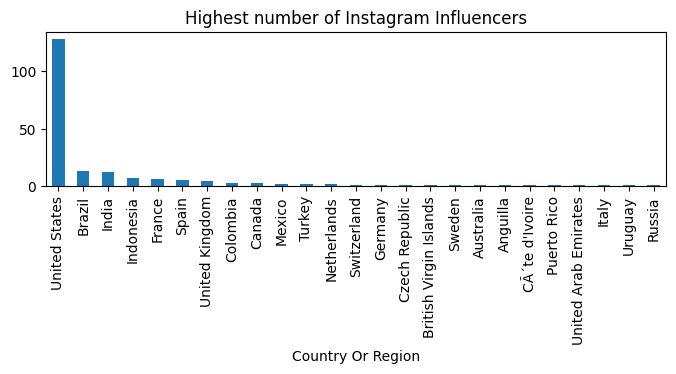

In [23]:
df["Country Or Region"].value_counts().plot.bar(figsize=(8, 2))
plt.title('Highest number of Instagram Influencers')
plt.show()

Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

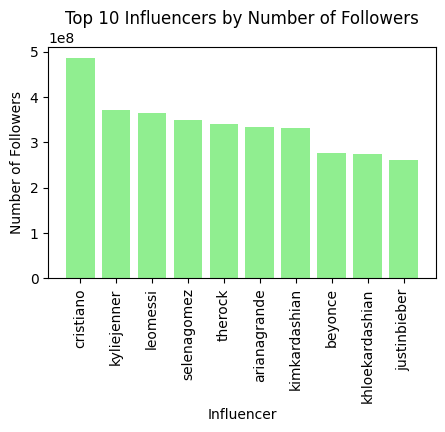

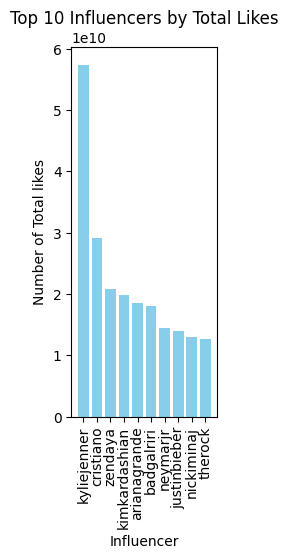

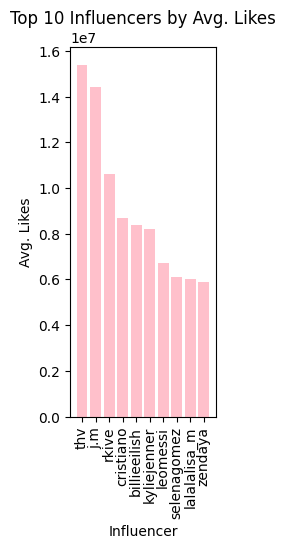

In [34]:
plt.figure(figsize=(5,3))
plt.subplot(1, 1, 1)

top_followers = df.sort_values(by='Followers', ascending=False).head(10)
plt.bar(top_followers['Channel Info'], top_followers['Followers'], color='lightgreen')
plt.xlabel('Influencer')
plt.ylabel('Number of Followers')
plt.title('Top 10 Influencers by Number of Followers')
plt.xticks(rotation=90)
plt.show()

plt.subplot(1, 3, 2)
top_posts = df.sort_values(by='Total Likes', ascending=False).head(10)
plt.bar(top_posts['Channel Info'], top_posts['Total Likes'], color='skyblue')
plt.xlabel('Influencer')
plt.ylabel('Number of Total likes')
plt.title('Top 10 Influencers by Total Likes')
plt.xticks(rotation=90)
plt.show()

plt.subplot(1, 3, 3)
top_posts = df.sort_values(by='Avg. Likes', ascending=False).head(10)
plt.bar(top_posts['Channel Info'], top_posts['Avg. Likes'], color='pink')
plt.xlabel('Influencer')
plt.ylabel('Avg. Likes')
plt.title('Top 10 Influencers by Avg. Likes')
plt.xticks(rotation=90)
plt.show()

5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

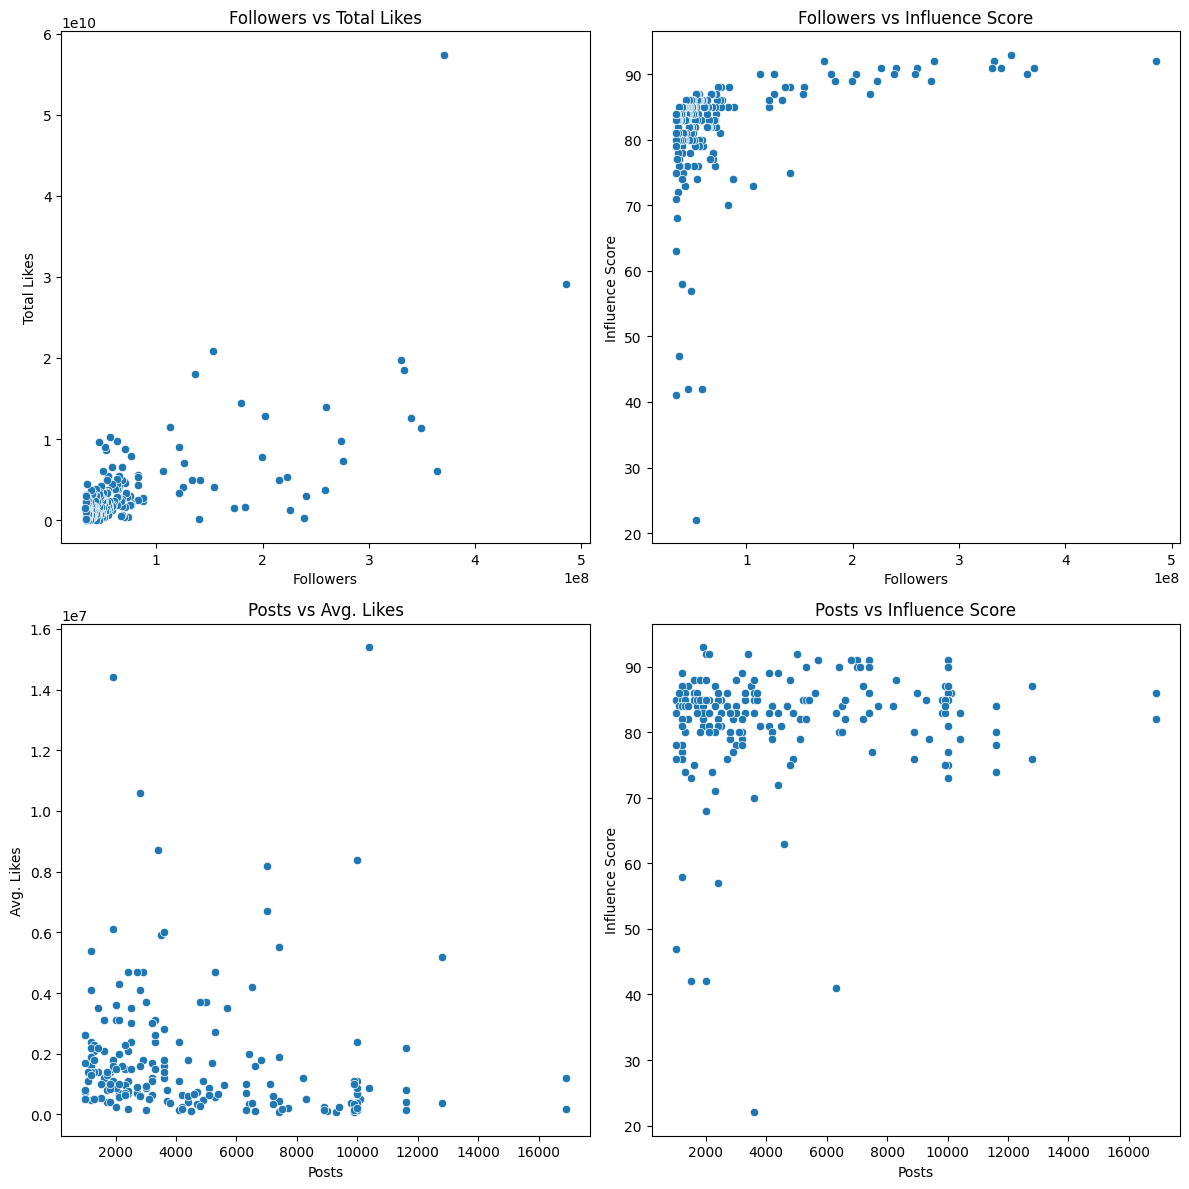

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Scatter plot for Followers and Total Likes
plt.subplot(2, 2, 1)
sns.scatterplot(x='Followers', y='Total Likes', data=df)
plt.title('Followers vs Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes')

# Scatter plot for Followers and Influence Score
plt.subplot(2, 2, 2)
sns.scatterplot(x='Followers', y='Influence Score', data=df)
plt.title('Followers vs Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')

# Scatter plot for Posts and Average Likes
plt.subplot(2, 2, 3)
sns.scatterplot(x='Posts', y='Avg. Likes', data=df)
plt.title('Posts vs Avg. Likes')
plt.xlabel('Posts')
plt.ylabel('Avg. Likes')

# Scatter plot for Posts and Influence Score
plt.subplot(2, 2, 4)
sns.scatterplot(x='Posts', y='Influence Score', data=df)
plt.title('Posts vs Influence Score')
plt.xlabel('Posts')
plt.ylabel('Influence Score')

plt.tight_layout()
plt.show()